In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [189]:
pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/asrh/sc-est2019-agesex-civ.csv')
pop = pop[pop.SEX == 0]
pop = pop[['NAME','AGE','POPEST2019_CIV']]
pop.columns = ['NAME','AGE','Population']
pop['AgeGroup'] = pd.cut(pop['AGE'], bins = [-1, 24, 34, 44, 54, 64, 74, 84, 85, 9999],
       labels = ['0-24','25-34','35-44','45-54','55-64','65-74','75-84','85+','All Ages'])
population = pop.groupby(['NAME','AgeGroup'])['Population'].sum().reset_index()

In [201]:
Biggest = population[population.AgeGroup == 'All Ages'].sort_values('Population', ascending = False)['NAME']
def get_biggest_states(number = 10):
    number = number + 1
    return Biggest[:number]

In [237]:
center = pd.read_csv("https://www2.census.gov/geo/docs/reference/cenpop2010/CenPop2010_Mean_ST.txt")
also = pd.read_csv("https://www2.census.gov/geo/docs/reference/cenpop2010/CenPop2010_Mean_US.txt")
also['STNAME'] = 'United States'
center = center.append(also)
center = center[['STNAME','LATITUDE','LONGITUDE']]

In [273]:
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')

In [274]:
def condition_to_group(condition):
    condition = condition.replace(['Influenza and pneumonia','Chronic lower respiratory diseases','Adult respiratory distress syndrome',
                       'Respiratory failure','Respiratory arrest','Other diseases of the respiratory system'],'Respiratory diseases')
    condition = condition.replace(['Hypertensive diseases','Ischemic heart disease','Cardiac arrest','Cardiac arrhythmia',
                                  'Heart failure','Cerebrovascular diseases','Other diseases of the circulatory system'],'Circulatory diseases')
    return condition
def condition_to_ICD10(condition):
    codes = ['J09-J18','J40-J47','J80','J96','R09.2','J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J97-J99, U04',
            'I10-I15','I20-I25','I46','I44, I45, I47-I49','I50','I60-I69',
            'I00-I09, I26-I43, I51, I52, I70-I99','A40-A41','C00-C97','E10-E14','E65-E68','G30',
             'F01, F03','N17-N19',
             'S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03',
             'A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99',
            'U071']
    conditions = ['Influenza and pneumonia','Chronic lower respiratory diseases',
                  'Adult respiratory distress syndrome','Respiratory failure','Respiratory arrest',
                'Other diseases of the respiratory system','Hypertensive diseases','Ischemic heart disease',
                'Cardiac arrest','Cardiac arrhythmia','Heart failure','Cerebrovascular diseases',
                'Other diseases of the circulatory system','Sepsis','Malignant neoplasms','Diabetes',
                  'Obesity','Alzheimer disease','Vascular and unspecified dementia',
                  'Renal failure',
                  'Intentional and unintentional injury, poisoning, and other adverse events',
                  'All other conditions and causes (residual)','COVID-19']
    condition = condition.replace(conditions, codes)
    return condition

In [275]:
df = df[(df.State != 'Puerto Rico') & (df.State != 'New York City')]
filt = df[(df['Start Date'] != '05/01/2021') & (df['Group'] == 'By Month')]
by_may1 = filt.groupby(['State','Age Group','Condition'])[['COVID-19 Deaths','Number of Mentions']].sum().reset_index()                                                
by_may1['Condition Group'] = condition_to_group(by_may1['Condition'])
by_may1 = by_may1.merge(population, how='left', left_on=['State','Age Group'], right_on=['NAME','AgeGroup'])
by_may1 = by_may1.drop(['NAME','AgeGroup'], axis = 1)
by_may1['Death Rate'] = by_may1['COVID-19 Deaths']/by_may1['Population']*100
by_may1['Mention Rate'] = by_may1['Number of Mentions']/by_may1['Population']*100

In [276]:
df = df.merge(population, how = 'left', left_on=['State','Age Group'], right_on = ['NAME','AgeGroup'])
df = df.drop(['NAME','AgeGroup'], axis = 1)
df['Death Rate'] = df['COVID-19 Deaths']/df['Population']*100
df['Mention Rate'] = df['Number of Mentions']/df['Population']*100
df = df[(df['Start Date'] != '05/01/2021')]
df = df.drop(['Flag','Data As Of','End Date','ICD10_codes', 'Year'], axis = 1)

In [287]:
df_tmp = df.query('Group == "By Month"')

In [288]:
df_tmp.head()

,Start Date,Group,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions,Population,Death Rate,Mention Rate
35880,01/01/2020,By Month,1.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,0.0,0.0,102821051.0,0.000000,0.000000
35881,02/01/2020,By Month,2.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,0.0,0.0,102821051.0,0.000000,0.000000
35882,03/01/2020,By Month,3.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,9.0,9.0,102821051.0,0.000009,0.000009
35883,04/01/2020,By Month,4.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,27.0,30.0,102821051.0,0.000026,0.000029
35884,05/01/2020,By Month,5.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,20.0,20.0,102821051.0,0.000019,0.000019


In [297]:
df_ts = df_tmp.drop(['Group', 'Month', 'State', 'Condition Group', 'Condition', 'Age Group'], axis = 1)

In [435]:
df_t = df_tmp.drop(['Group', 'Month', 'State', 'Condition Group', 'Condition', 'Age Group'], axis = 1)

In [298]:
df_ts.shape

(191360, 6)

In [299]:
df_ts.isna().sum()/df_ts.shape[0]

Start Date            0.000000
COVID-19 Deaths       0.262725
Number of Mentions    0.255482
Population            0.100000
Death Rate            0.362495
Mention Rate          0.355252
dtype: float64

In [300]:
df_ts = df_ts.dropna()

In [436]:
df_t = df_t.dropna()

In [301]:
df_ts.isna().sum()/df_ts.shape[0]

Start Date            0.0
COVID-19 Deaths       0.0
Number of Mentions    0.0
Population            0.0
Death Rate            0.0
Mention Rate          0.0
dtype: float64

In [306]:
df_ts['Start Date'] = pd.to_datetime(df_ts['Start Date'] )

In [307]:
df_ts = df_ts.sort_values("Start Date")

In [439]:
df_t = df_t.sort_values("Start Date")

In [308]:
df_ts = df_ts.groupby('Start Date')['COVID-19 Deaths'].sum().reset_index()

In [440]:
df_t = df_t.groupby('Start Date')['COVID-19 Deaths'].sum().reset_index()

In [309]:
df_ts.head()

,Start Date,COVID-19 Deaths
0,2020-01-01,64.0
1,2020-02-01,140.0
2,2020-03-01,77510.0
3,2020-04-01,799717.0
4,2020-05-01,520851.0


In [310]:
# df_ts['Start Date'] = pd.to_datetime(df['Start Date'] )
df_ts = df_ts.set_index('Start Date')

In [311]:
# indexing with time sereis data 
# df_ts = df_ts.set_index('End Date')
df_ts.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='Start Date', freq=None)

In [312]:
# get average daily death cases value for the month, using the start of each month as timestamp
y = df_ts['COVID-19 Deaths'].resample("MS").mean()

### Visualize Death Cases Time Series Data

In [315]:

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

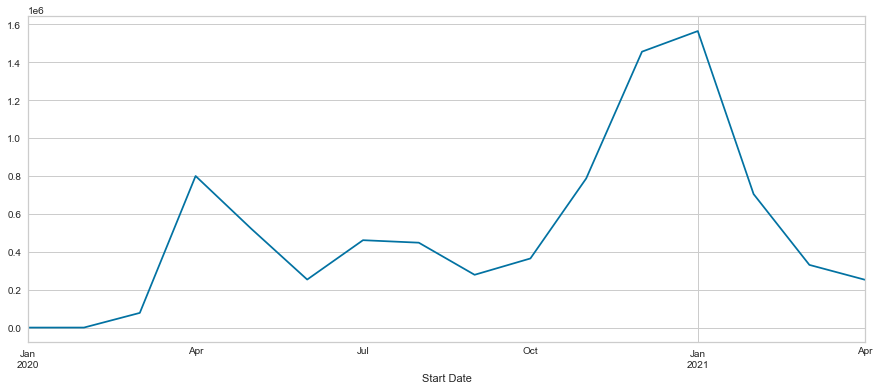

In [313]:
y.plot(figsize=(15, 6))
plt.show()

- There are two peaks. One is April, 2020, another one is Jan, 2021. 
- There is a seasonality pattern: the peak occurs every 3 months 

In [317]:
# https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be
# period = len(df_unnested)/2

In [318]:
len(df_ts)/2

8.0

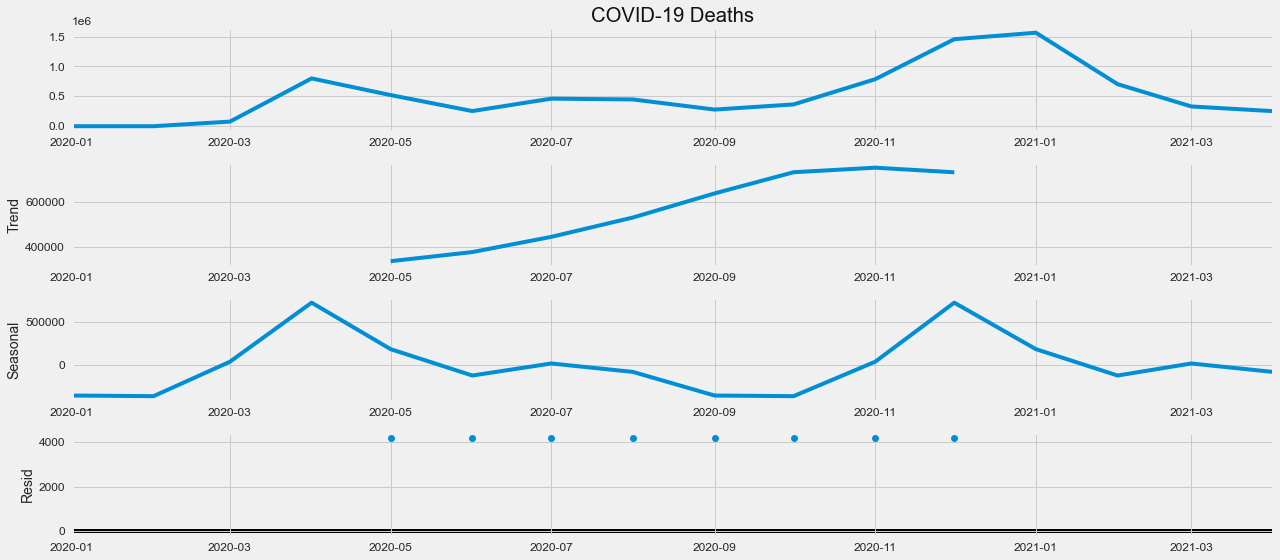

In [320]:
# visulize data by decompostion of trend, seasonality, and noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive', period = 8)
fig = decomposition.plot()
plt.show()

- Increasing trend during 2020-03 ~ 2020-11, decreasing trend other time periods
- Similar patterns exist during 2020-01 ~ 2020-09 and 2020-10 ~ 2021-03
- Noise seems to be distributed evenly acorss different time ranges

### Detrending 

- compare different detrending methods: differencing, linear model fitting, polynomial model fitting 
- select the best detrending method to make data stationary 

In [360]:
# detrend by differencing 
def differencing(series, n):
    X = series.values
    diff = list()
    for i in range(1, len(X)):
        value = X[i] - X[i - n]
        diff.append(value)
    pyplot.plot(diff)
    pyplot.show()
    return diff

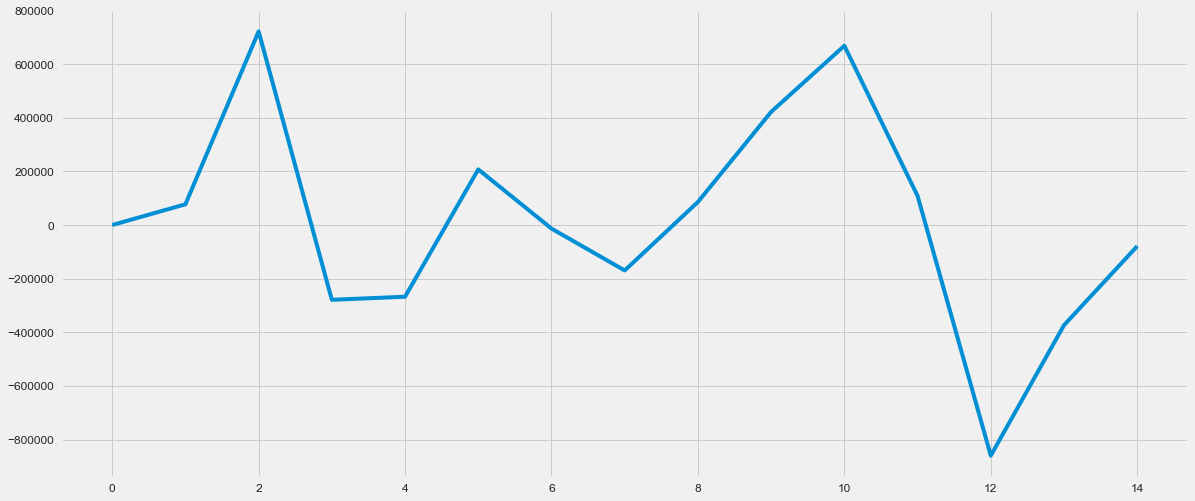

In [361]:
diff_ts1 = differencing(series, 1)

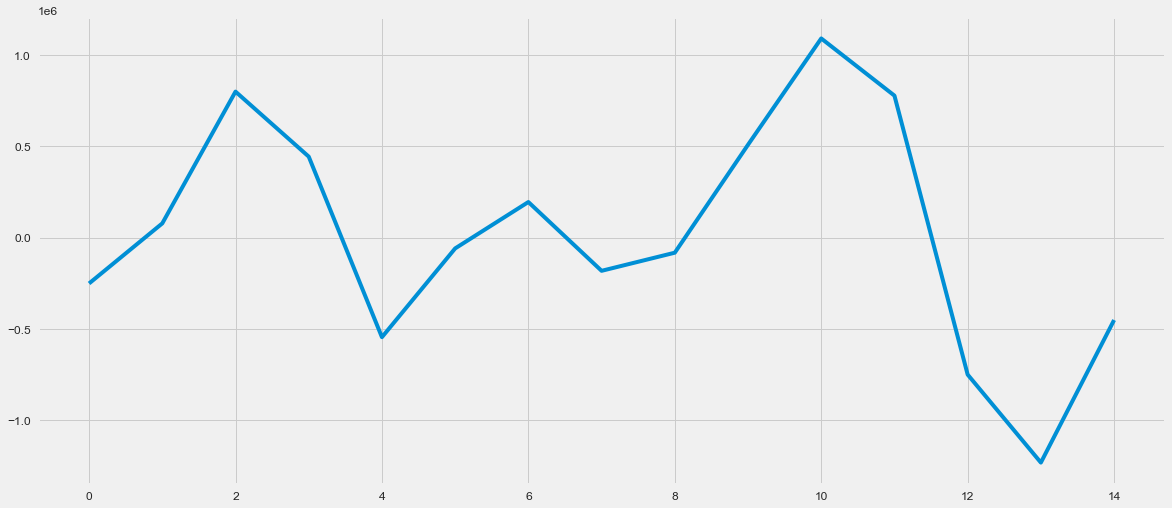

In [362]:
diff_ts2 = differencing(series, 2)

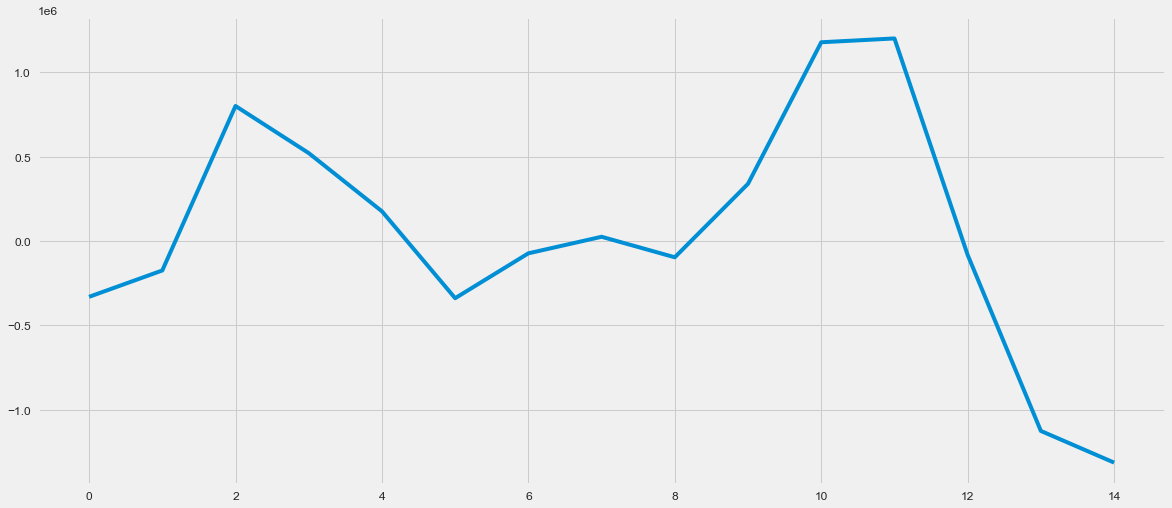

In [363]:
diff_ts3 = differencing(series, 3)

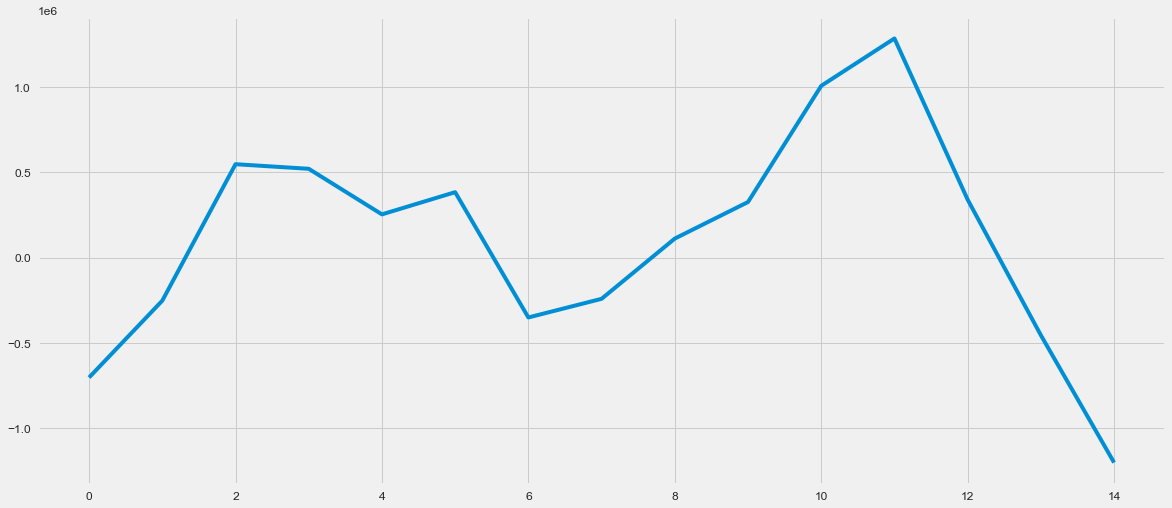

In [364]:
diff_ts4 = differencing(series, 4)

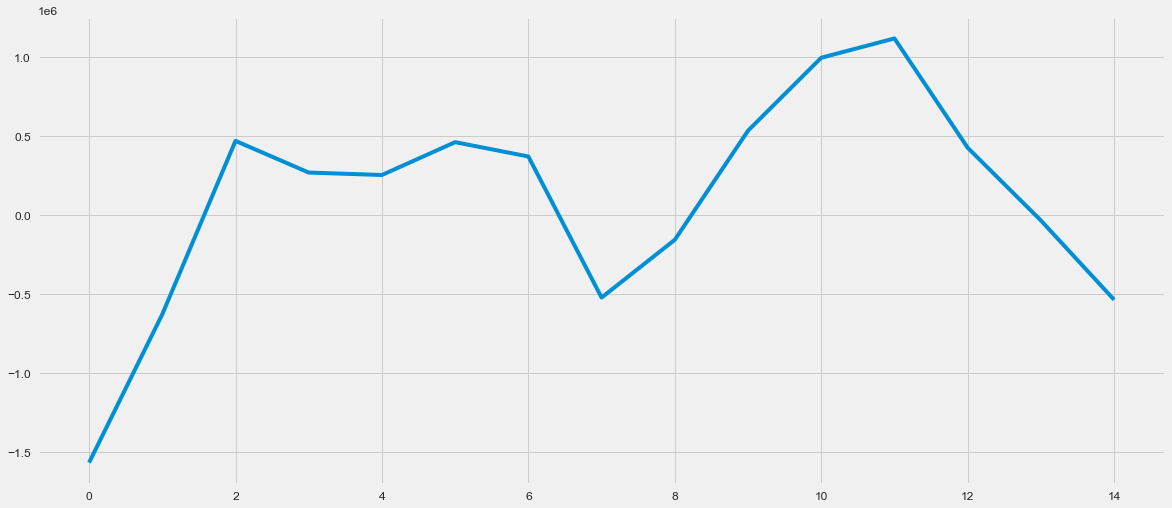

In [365]:
diff_ts5 = differencing(series, 5)

Among all the differencing time series data, the time series data with 4 differencing seems to yield a more stationary time series. 

In [330]:
# detrend by model fitting 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

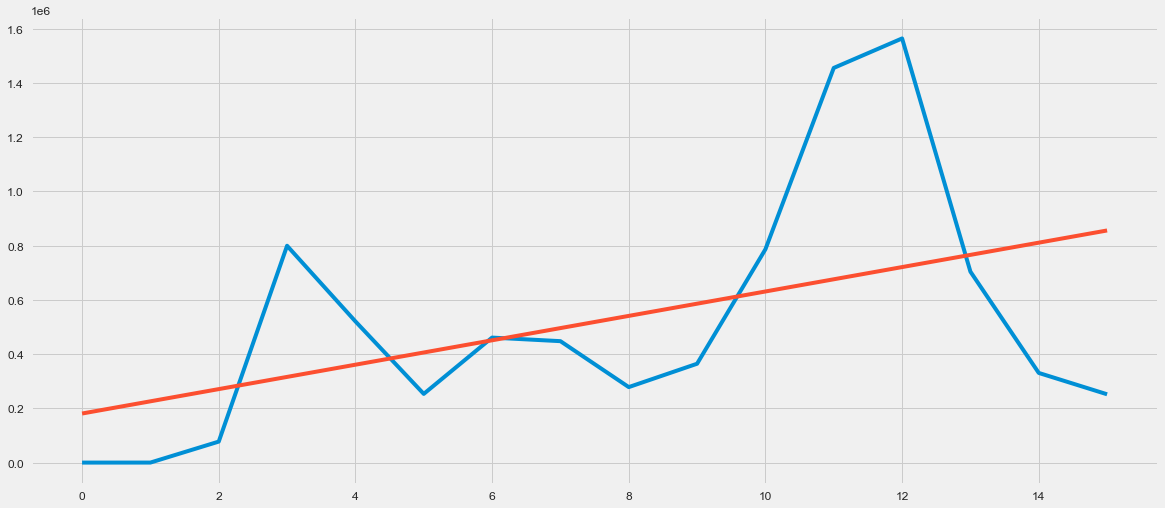

In [331]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = df_ts['COVID-19 Deaths']
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# the overall trend is increasing 

[-180992.02205882373, -225922.31911764725, -193558.61617647076, 483642.0867647058, 159769.78970588226, -152643.50735294126, 9983.195588235278, -48188.10147058824, -262605.39852941176, -221455.69558823528, 155695.0073529412, 779484.7102941177, 843203.4132352943, -61828.883823529235, -480421.18088235275, -604162.4779411763]


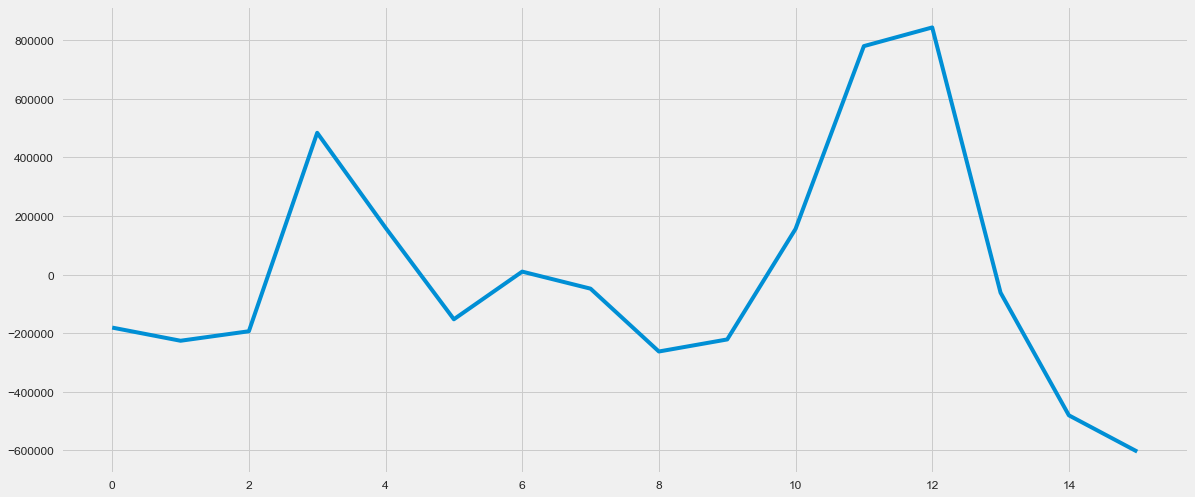

In [332]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
print(detrended)
# plot detrended
pyplot.plot(detrended)
pyplot.show()
# there is still stochastic trends after detrending the time series model 

In [343]:
# compute RMSE and R2 score between data and the extracted trend
r2 = r2_score(y, trend)
rmse = np.sqrt(mean_squared_error(y, trend))
print('r2:', r2)
print('rmse', rmse)

r2: 0.21824546549052015
rmse 392658.8040819438


In [347]:
from sklearn.preprocessing import PolynomialFeatures

In [348]:
# assume data with a quadratic trend
# transform X in a quadratic form 
def polynomial_detrend(n, X, y):
    pf = PolynomialFeatures(degree=2)
    Xp = pf.fit_transform(X)
    # fit linear model 
    md2 = LinearRegression()
    md2.fit(Xp, y)
    trendp = md2.predict(Xp)
    # trend 
    plt.plot(X, y)
    plt.plot(X, trendp)
    plt.legend(['data', 'polynomial trend'])
    plt.show()
    # detrended data
    detrpoly = [y[i] - trendp[i] for i in range(0, len(y))]
    plt.plot(X, detrpoly)
    plt.title('polynomially detrended data')
    plt.show()
    return trendp, detrpoly

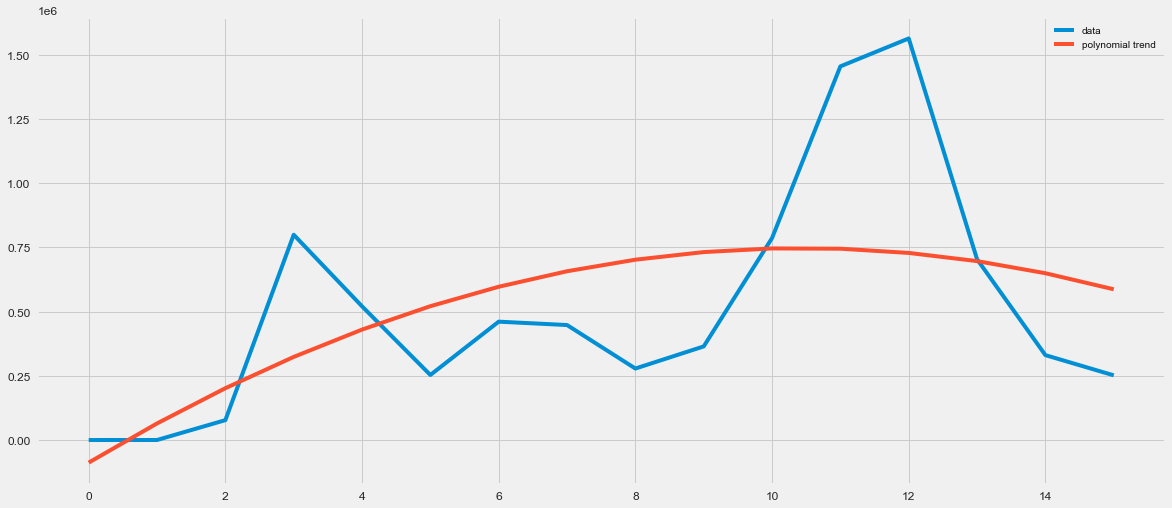

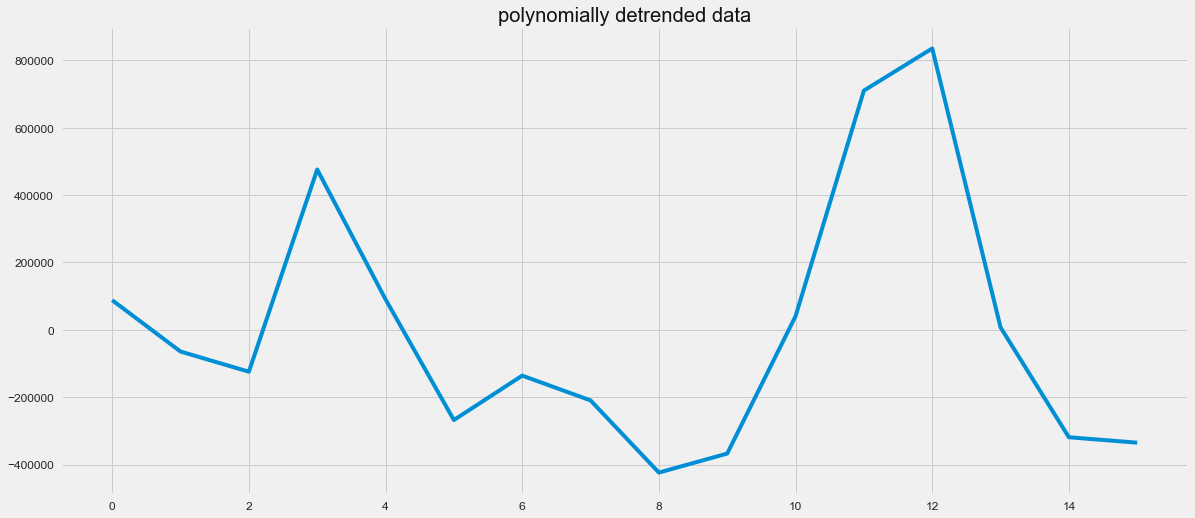

In [349]:
poly2_trend, detrend2_ts = polynomial_detrend(2, X, y)

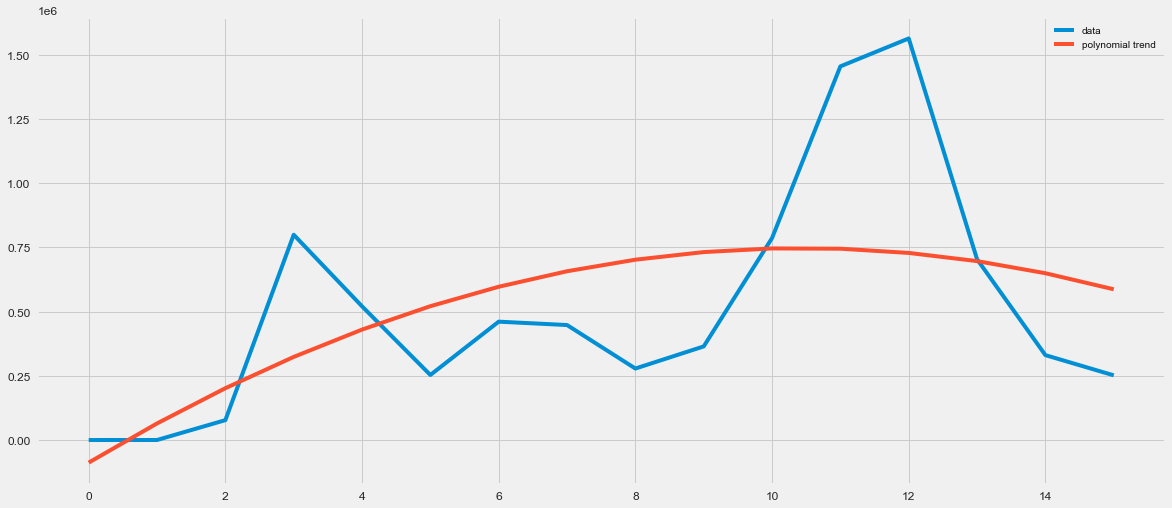

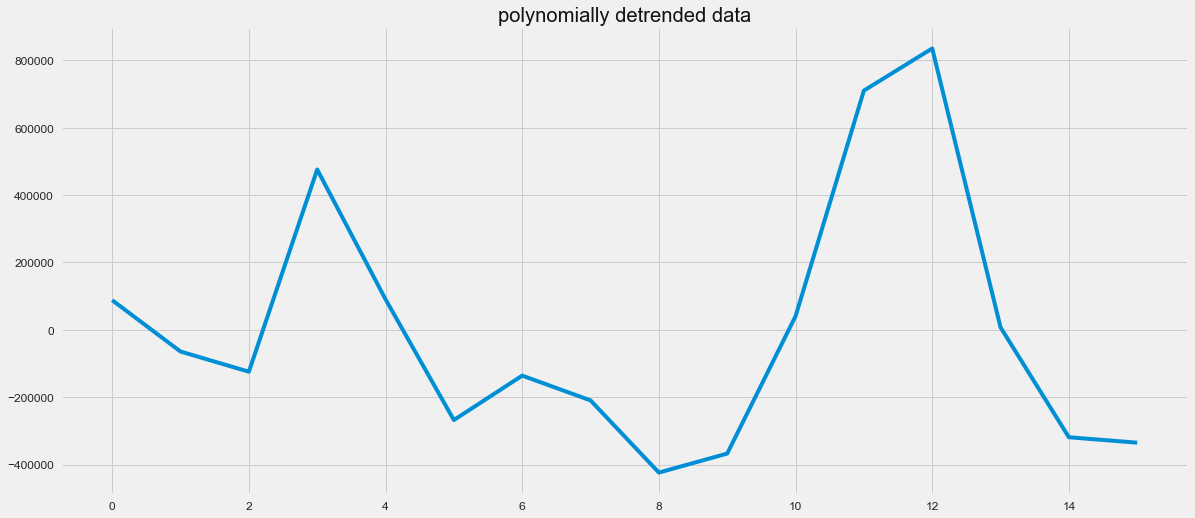

In [352]:
poly4_trend, detrend4_ts = polynomial_detrend(4, X, y)

- In conclusion, the detrended data based on differencing results in a more stationary time series compared with other detrending metnhods. 
- choose the differencing 2 time series data for analysis

### Stationarity of Data

In [382]:
from statsmodels.tsa.stattools import adfuller
def ad_full_test(series_lst):
    p_values = []
    adfs = []
    for series in series_lst: 
        ad_fuller_result = adfuller(series)
        p_value = ad_fuller_result[1]
        adf = ad_fuller_result[0]
        adfs.append(adf)
        p_values.append(p_value)
    index_min = np.argmin(p_values)
    print(f'ADF Statistic: {adfs[index_min]}')
    print(f'p-value: {p_values[index_min]}')
    return series_lst[index_min], index_min
    
# the p-value is 1.7644669306896384e-05, which is way smaller than 0.05, the null hypothesis of data is non-stationary is rejected.

In [384]:
series_lst  = [diff_ts1, diff_ts2, diff_ts3, diff_ts4, detrended,detrend2_ts, detrend3_ts ]
new_ts, min_index= ad_full_test(series_lst)

ADF Statistic: -14.89117203415421
p-value: 1.5565112954335274e-27


In [385]:
print(min_index)
# the selcted detrended time series is the one with linear model fitting 

4


### PACF, ACF

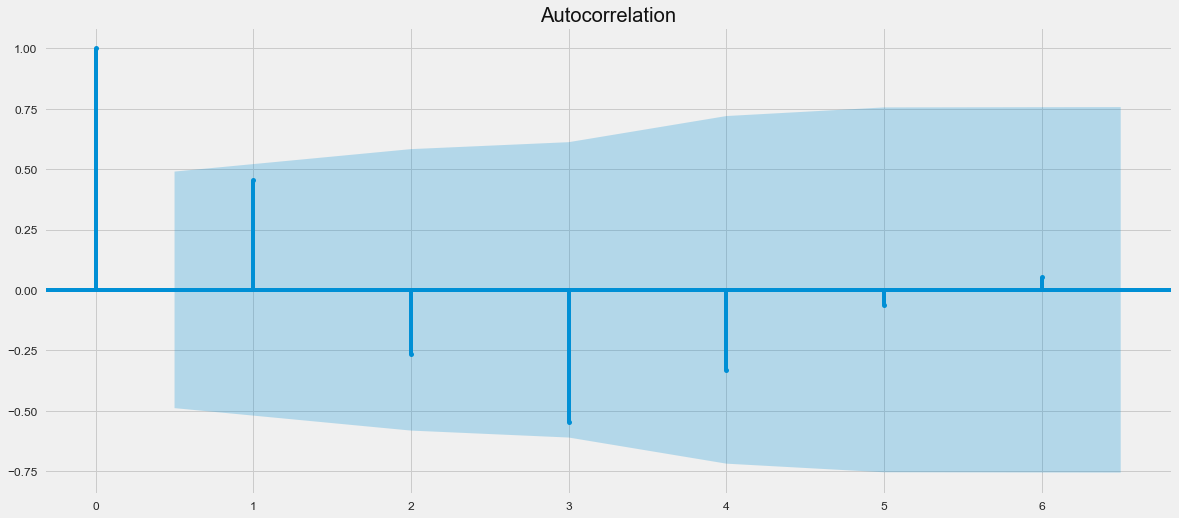

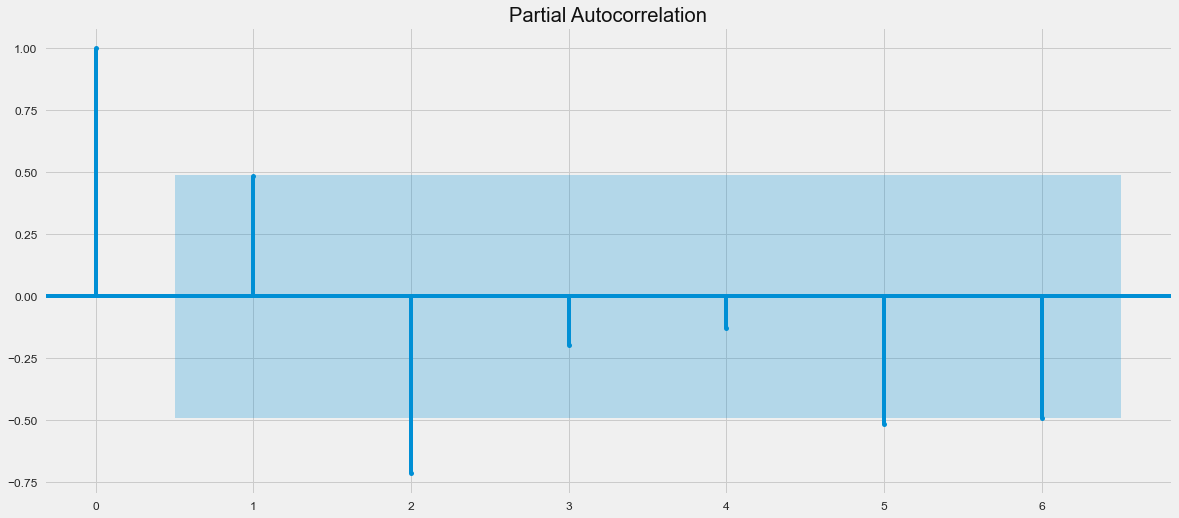

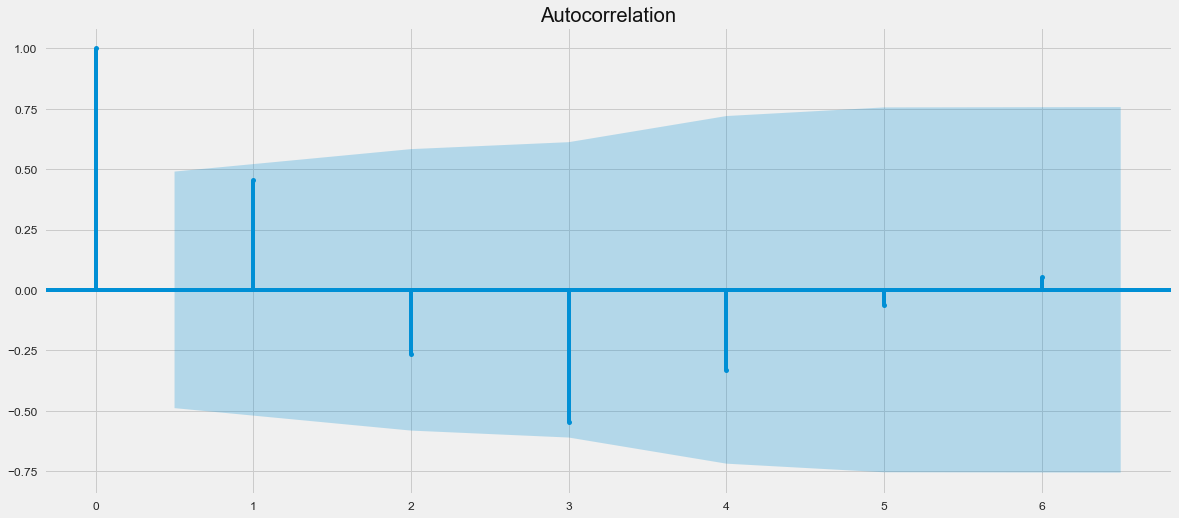

In [386]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(new_ts, lags = 6)
plot_acf(new_ts, lags = 6)
# ACF plot shows autocrrelation deacaying towards zero
# PACF cuts off at lag 1
# Based on ACF and PACF, AR(1) model might be fitted to our data

### Time Series Forcasting with ARIMA

In [389]:
new_series = np.array(new_ts, dtype = np.float32)

In [405]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [406]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:448.58551375046983
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:90.52729361528844
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:89.83784396269209
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:124.7725810167945
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:92.52729370176938
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:409.5526079577273
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:62.918699729419345
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:195.11858647633136
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:120.31942116013732
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:64.91869826838973
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:403.28055914769095
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:59.96356639643004
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:64.84390108438923
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - A

In [407]:
# ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
# ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
# ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
# ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0

In [414]:
def fit_sarima(y, p, d, q, n1, n2, n3, n4):
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()

    print(results.summary().tables[1])
    return results

In [415]:
result1 = fit_sarima(new_series, 0, 0, 0, 0, 0, 1, 12)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2      2.445e+10         -0       -inf      0.000    2.44e+10    2.44e+10


In [416]:
result2 = fit_sarima(new_series, 0, 0, 0, 1, 1, 0, 12)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2      2.445e+10         -0       -inf      0.000    2.44e+10    2.44e+10


In [417]:
result3 = fit_sarima(new_series, 0, 1, 0, 0, 1, 1, 12)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2      2.445e+10         -0       -inf      0.000    2.44e+10    2.44e+10


In [418]:
result4 = fit_sarima(new_series, 0, 1, 0, 1, 1, 0, 12)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2      2.445e+10         -0       -inf      0.000    2.44e+10    2.44e+10


In [420]:
# arima doesn't seem to be a good fit? 

### Time Series Modeling with Prophet

In [422]:
!conda install -c conda-forge fbprophet -y

Solving environment: done

## Package Plan ##

  environment location: /Users/cookiepoon/anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       h033912b_0         136 KB  conda-forge
    cctools-949.0.1            |       h22b1bf0_0          16 KB  conda-forge
    cctools_osx-64-949.0.1     |       h5ba7a2e_0         1.8 MB  conda-forge
    certifi-2021.5.30          |   py37hf985489_0         141 KB  conda-forge
    clang-9.0.1                |default_hf57f61e_0        22.1 MB  conda-forge
    clang_osx-64-9.0.1         |       h05bbb7f_0          14 KB  conda-forge
    clangxx-9.0.1              |default_hf57f61e_0         122 KB  conda-forge
    clangxx_osx-64-9.0.1       |       h05bbb7f_2          14 KB  conda-forge
    compiler-rt-9.0.1          |       h6a512c6_3          66 KB  conda-forge
    compi

In [426]:
df_ts.head()

,COVID-19 Deaths
Start Date,
2020-01-01,64.0
2020-02-01,140.0
2020-03-01,77510.0
2020-04-01,799717.0
2020-05-01,520851.0


In [453]:
df_ts.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='Start Date', freq=None)

In [457]:
from fbprophet import Prophet
df_copy = df_ts.copy()
df_copy = df_copy.reset_index()

In [458]:
df_copy.columns

Index(['Start Date', 'COVID-19 Deaths'], dtype='object')

In [459]:
df_ts_new = df_copy.rename(columns={'Start Date': 'ds', 'COVID-19 Deaths': 'y'})

In [465]:
ph_model = Prophet(interval_width=0.95, yearly_seasonality = True,weekly_seasonality=True, daily_seasonality=True, n_changepoints = 11)
ph_model.fit(df_ts_new)

In [468]:
deaths_forecast = ph_model.make_future_dataframe(periods=36, freq='MS')
deaths_forecast = ph_model.predict(deaths_forecast)


<Figure size 1296x432 with 0 Axes>

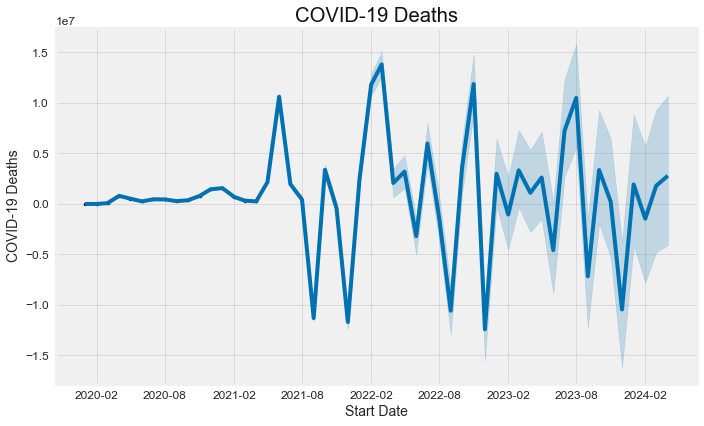

In [469]:
plt.figure(figsize=(18, 6))
ph_model.plot(deaths_forecast, xlabel =  'Start Date', ylabel = 'COVID-19 Deaths')
plt.title('COVID-19 Deaths');
# future death cases show a descreasing trend 

### Trends and Patterns from Forcast

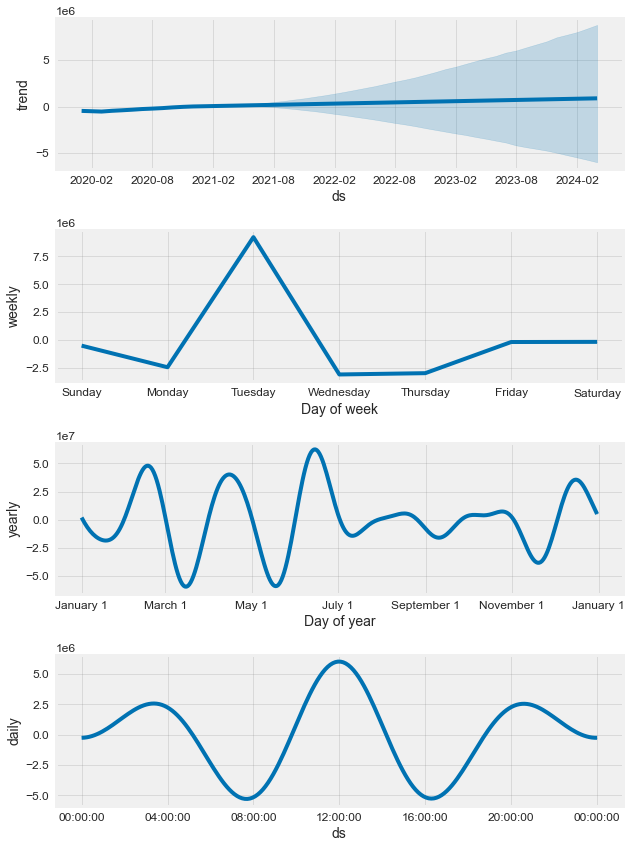

In [472]:
ph_model.plot_components(deaths_forecast);

- yearly trend slightly increase, but stable
- weekly trend has peak on Tuesday
- In day of year, peak exists in March, May and July
- dairly trend's peak exists in 12:00:00